In [1]:
import sys
sys.path.append("..")
from src.utils import train_model, evaluate_model, display_model_predictions, imshow
from src.dataset_RAF_DB import get_dataloaders, EMOTIONS_TO_IDX
from torchvision import models
import torch
import torch.nn as nn
import torch.optim as optim
import warnings

warnings.filterwarnings("ignore")

IDX_TO_EMOTIONS = {v: k for k, v in EMOTIONS_TO_IDX.items()}
NUM_CLASSES = len(EMOTIONS_TO_IDX)
IDX_TO_EMOTIONS

{0: 'angry',
 1: 'disgust',
 2: 'fear',
 3: 'happy',
 4: 'neutral',
 5: 'sad',
 6: 'surprise'}

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [10]:
train = 1
model = models.resnet18(pretrained=True)
num_epochs = 50
num_classes = len(IDX_TO_EMOTIONS.values())
model.fc = nn.Linear(model.fc.in_features, num_classes)

train_loader, test_loader = get_dataloaders("..\\data")

dataiter = iter(train_loader)
images, labels = next(dataiter)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7411594..0.2696297].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.1975338].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8267832..1.6291069].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.4929972..2.3262744].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.0648367].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7556022..1.8550389].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..

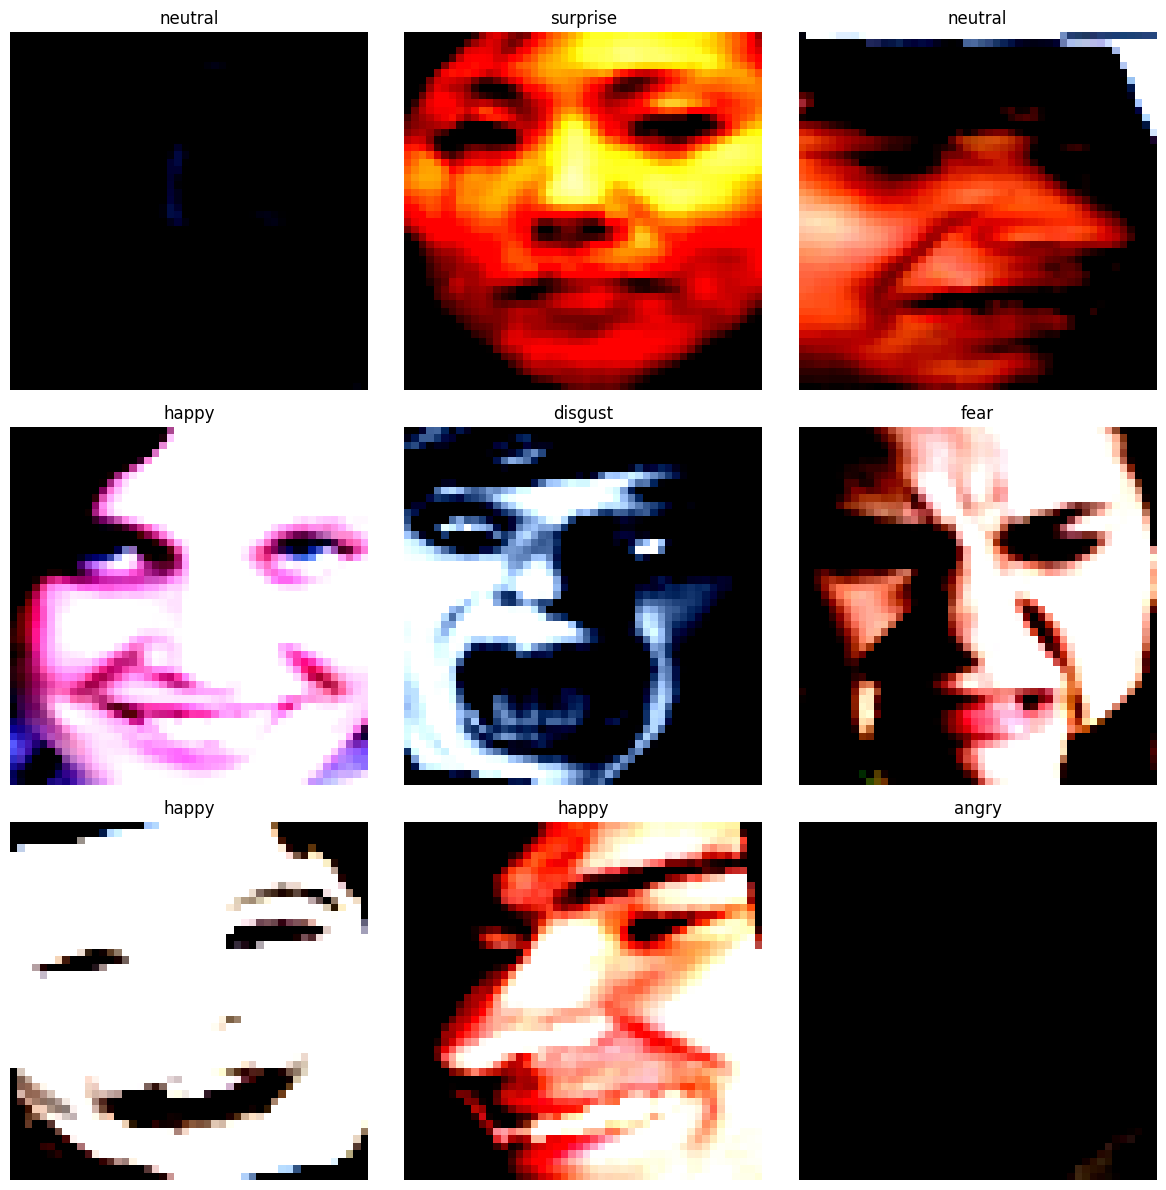

In [11]:
import matplotlib.pyplot as plt



img_grid = images[:9] 
labels_grid = labels[:9]

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.flatten()

for i in range(len(img_grid)):
    # Get the current image and convert it for display
    img = img_grid[i].permute(1, 2, 0).cpu()
    
    # Get the emotion label
    emotion = IDX_TO_EMOTIONS[labels_grid[i].item()]
    
    # Display the image in the appropriate subplot with its emotion label
    axes[i].imshow(img)
    axes[i].set_title(emotion)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [12]:

if train:
    # Get dataloaders
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = torch.nn.CrossEntropyLoss()

    # Train the model
    train_model(
        model=model,
        train_loader=train_loader,
        criterion=criterion,
        optimizer=optimizer,
        num_epochs=num_epochs,
        device=device,
    )
else:
    # Load the model
    model.load_state_dict(torch.load("ResNet_epoch_66.pth", map_location=device))
    model.to(device)
    model.eval()

Epoch 1/50: 100%|██████████| 192/192 [00:15<00:00, 12.66it/s, current_loss=0.928]


Epoch 1/50 completed in 0 minutes and 45 seconds


Epoch 2/50: 100%|██████████| 192/192 [00:14<00:00, 13.45it/s, current_loss=0.865]


Epoch 2/50 completed in 0 minutes and 45 seconds


Epoch 3/50: 100%|██████████| 192/192 [00:14<00:00, 12.88it/s, current_loss=0.786]


Epoch 3/50 completed in 0 minutes and 44 seconds


Epoch 4/50: 100%|██████████| 192/192 [00:14<00:00, 13.23it/s, current_loss=0.748]


Epoch 4/50 completed in 0 minutes and 44 seconds


Epoch 5/50: 100%|██████████| 192/192 [00:14<00:00, 13.66it/s, current_loss=0.674]


Epoch 5/50 completed in 0 minutes and 43 seconds


Epoch 6/50: 100%|██████████| 192/192 [00:13<00:00, 14.21it/s, current_loss=0.44]


Epoch 6/50 completed in 0 minutes and 42 seconds


Epoch 7/50: 100%|██████████| 192/192 [00:15<00:00, 12.44it/s, current_loss=0.701]


Epoch 7/50 completed in 0 minutes and 45 seconds


Epoch 8/50: 100%|██████████| 192/192 [00:14<00:00, 12.95it/s, current_loss=0.715]


Epoch 8/50 completed in 0 minutes and 44 seconds


Epoch 9/50: 100%|██████████| 192/192 [00:13<00:00, 13.96it/s, current_loss=0.816]


Epoch 9/50 completed in 0 minutes and 42 seconds


Epoch 10/50: 100%|██████████| 192/192 [00:13<00:00, 14.60it/s, current_loss=0.878]


Epoch 10/50 completed in 0 minutes and 44 seconds


Epoch 11/50: 100%|██████████| 192/192 [00:13<00:00, 14.72it/s, current_loss=0.444]


Epoch 11/50 completed in 0 minutes and 40 seconds


Epoch 12/50: 100%|██████████| 192/192 [00:12<00:00, 15.23it/s, current_loss=0.552]


Epoch 12/50 completed in 0 minutes and 39 seconds


Epoch 13/50: 100%|██████████| 192/192 [00:14<00:00, 13.45it/s, current_loss=0.679]


Epoch 13/50 completed in 0 minutes and 43 seconds


Epoch 14/50: 100%|██████████| 192/192 [00:14<00:00, 12.87it/s, current_loss=0.526]


Epoch 14/50 completed in 0 minutes and 44 seconds


Epoch 15/50: 100%|██████████| 192/192 [00:14<00:00, 13.23it/s, current_loss=0.386]


Epoch 15/50 completed in 0 minutes and 43 seconds


Epoch 16/50: 100%|██████████| 192/192 [00:11<00:00, 16.23it/s, current_loss=0.498]


Epoch 16/50 completed in 0 minutes and 42 seconds


Epoch 17/50: 100%|██████████| 192/192 [00:13<00:00, 14.61it/s, current_loss=0.385]


Epoch 17/50 completed in 0 minutes and 42 seconds


Epoch 18/50: 100%|██████████| 192/192 [00:12<00:00, 15.86it/s, current_loss=0.438]


Epoch 18/50 completed in 0 minutes and 38 seconds


Epoch 19/50: 100%|██████████| 192/192 [00:12<00:00, 14.87it/s, current_loss=0.327]


Epoch 19/50 completed in 0 minutes and 39 seconds


Epoch 20/50: 100%|██████████| 192/192 [00:13<00:00, 14.72it/s, current_loss=0.383]


Epoch 20/50 completed in 0 minutes and 40 seconds


Epoch 21/50: 100%|██████████| 192/192 [00:12<00:00, 15.74it/s, current_loss=0.368]


Epoch 21/50 completed in 0 minutes and 38 seconds


Epoch 22/50: 100%|██████████| 192/192 [00:12<00:00, 15.12it/s, current_loss=0.404]


Epoch 22/50 completed in 0 minutes and 39 seconds


Epoch 23/50: 100%|██████████| 192/192 [00:12<00:00, 14.81it/s, current_loss=0.457]


Epoch 23/50 completed in 0 minutes and 41 seconds


Epoch 24/50: 100%|██████████| 192/192 [00:13<00:00, 14.72it/s, current_loss=0.251]


Epoch 24/50 completed in 0 minutes and 40 seconds


Epoch 25/50: 100%|██████████| 192/192 [00:12<00:00, 15.52it/s, current_loss=0.645]


Epoch 25/50 completed in 0 minutes and 39 seconds


Epoch 26/50: 100%|██████████| 192/192 [00:12<00:00, 15.43it/s, current_loss=0.475]


Epoch 26/50 completed in 0 minutes and 39 seconds


Epoch 27/50: 100%|██████████| 192/192 [00:12<00:00, 15.06it/s, current_loss=0.302]


Epoch 27/50 completed in 0 minutes and 39 seconds


Epoch 28/50: 100%|██████████| 192/192 [00:13<00:00, 13.95it/s, current_loss=0.281]


Epoch 28/50 completed in 0 minutes and 41 seconds


Epoch 29/50: 100%|██████████| 192/192 [00:13<00:00, 13.86it/s, current_loss=0.291]


Epoch 29/50 completed in 0 minutes and 42 seconds


Epoch 30/50: 100%|██████████| 192/192 [00:13<00:00, 14.63it/s, current_loss=0.313]


Epoch 30/50 completed in 0 minutes and 42 seconds


Epoch 31/50: 100%|██████████| 192/192 [00:12<00:00, 15.45it/s, current_loss=0.193]


Epoch 31/50 completed in 0 minutes and 39 seconds


Epoch 32/50: 100%|██████████| 192/192 [00:13<00:00, 13.94it/s, current_loss=0.221]


Epoch 32/50 completed in 0 minutes and 40 seconds


Epoch 33/50: 100%|██████████| 192/192 [00:12<00:00, 14.91it/s, current_loss=0.268]


Epoch 33/50 completed in 0 minutes and 42 seconds


Epoch 34/50: 100%|██████████| 192/192 [00:14<00:00, 13.10it/s, current_loss=0.295]


Epoch 34/50 completed in 0 minutes and 44 seconds


Epoch 35/50: 100%|██████████| 192/192 [00:13<00:00, 14.13it/s, current_loss=0.234]


Epoch 35/50 completed in 0 minutes and 44 seconds


Epoch 36/50: 100%|██████████| 192/192 [00:13<00:00, 13.82it/s, current_loss=0.358]


Epoch 36/50 completed in 0 minutes and 43 seconds


Epoch 37/50: 100%|██████████| 192/192 [00:13<00:00, 14.11it/s, current_loss=0.548]


Epoch 37/50 completed in 0 minutes and 42 seconds


Epoch 38/50: 100%|██████████| 192/192 [00:15<00:00, 12.62it/s, current_loss=0.15]


Epoch 38/50 completed in 0 minutes and 46 seconds


Epoch 39/50: 100%|██████████| 192/192 [00:14<00:00, 13.40it/s, current_loss=0.183]


Epoch 39/50 completed in 0 minutes and 44 seconds


Epoch 40/50: 100%|██████████| 192/192 [00:13<00:00, 14.23it/s, current_loss=0.18]


Epoch 40/50 completed in 0 minutes and 43 seconds


Epoch 41/50: 100%|██████████| 192/192 [00:15<00:00, 12.36it/s, current_loss=0.225]


Epoch 41/50 completed in 0 minutes and 43 seconds


Epoch 42/50: 100%|██████████| 192/192 [00:14<00:00, 12.82it/s, current_loss=0.0837]


Epoch 42/50 completed in 0 minutes and 45 seconds


Epoch 43/50: 100%|██████████| 192/192 [00:15<00:00, 12.02it/s, current_loss=0.203]


Epoch 43/50 completed in 0 minutes and 46 seconds


Epoch 44/50: 100%|██████████| 192/192 [00:14<00:00, 13.16it/s, current_loss=0.138]


Epoch 44/50 completed in 0 minutes and 44 seconds


Epoch 45/50: 100%|██████████| 192/192 [00:15<00:00, 12.00it/s, current_loss=0.361]


Epoch 45/50 completed in 0 minutes and 46 seconds


Epoch 46/50: 100%|██████████| 192/192 [00:15<00:00, 12.44it/s, current_loss=0.272]


Epoch 46/50 completed in 0 minutes and 49 seconds


Epoch 47/50: 100%|██████████| 192/192 [00:16<00:00, 11.60it/s, current_loss=0.107]


Epoch 47/50 completed in 0 minutes and 47 seconds


Epoch 48/50: 100%|██████████| 192/192 [00:13<00:00, 14.62it/s, current_loss=0.109]


Epoch 48/50 completed in 0 minutes and 41 seconds


Epoch 49/50: 100%|██████████| 192/192 [00:14<00:00, 13.17it/s, current_loss=0.88]


Epoch 49/50 completed in 0 minutes and 42 seconds


Epoch 50/50: 100%|██████████| 192/192 [00:13<00:00, 14.12it/s, current_loss=0.236]

Epoch 50/50 completed in 0 minutes and 44 seconds


In [13]:
eval = 1
if eval:
    evaluate_model(model=model, test_loader=test_loader, device=device)

Evaluating: 100%|██████████| 48/48 [00:42<00:00,  1.12it/s, current_acc=78.39%]

Final Accuracy: 78.39%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.2902661..1.671852].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.3165266..1.671852].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4565826..1.7055321].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.35154063..1.6158917].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.50910366..1.1535234].


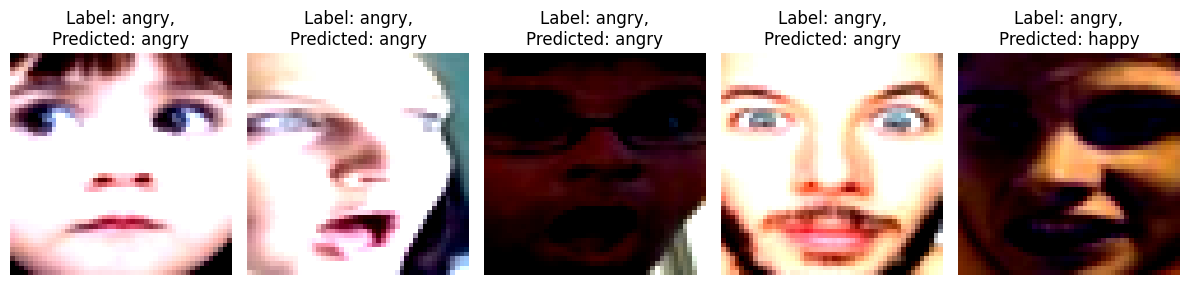

In [14]:
display_model_predictions(
    model=model,
    test_loader=test_loader,
    classes_dict=IDX_TO_EMOTIONS,
)